# Numerical Integration via Eulers Method:

$$ y_{i+1} = y_i + \frac{dy}{dt}|_{t_i} \times \Delta t_{i+1,i}$$

In [9]:
def pxdot(x,y):
    lamb = 1/3 
    wx = 1-2*lamb 

    return -wx*x - 4* lamb *(x**3 +2*y**2*x+2*x*y**2)

def pydot(x,y):
    lamb = 1/3 
    wy = 1+2*lamb 
    return wy*y - 4* lamb *(y**3 +2*x**2*y+ 2*y*x**2)

def xdot(px):
    return px

def ydot(py):
    return py



In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.colors as mcolors

delta =  0.000001
px = 0
py = 0
x =2
y = 1 
posx = []
posy = []
momx = []
momy = []
t = []
n = 4000000

for i in range(0,n):

    x = x + xdot(px)*delta 
    y = y + ydot(py)*delta
    px = px +pxdot(x,y)*delta
    py = py +pydot(x,y)*delta
    posx.append(x)
    posy.append(y)
    momx.append(px)
    momy.append(py)
    t.append(i)



In [18]:

fig, ax = plt.subplots(2,2, figsize = (25,20))
fig.suptitle('$\\delta t$ = {} '.format(delta))
ax[0,0].plot(np.multiply(t,delta),posx)
ax[0,0].set_ylabel('Position (X)')
ax[0,0].set_xlabel('Time')
ax[0,0].set_xlim(0,200)

ax[0,1].plot(np.multiply(t,delta),posy)
ax[0,1].set_ylabel('Position (Y)')
ax[0,1].set_xlabel('Time')
ax[0,1].set_xlim(0,200)

ax[1,0].scatter(posx,posy,c=cm.viridis(np.divide(t,n)), s=0.5) 
ax[1,0].set_ylabel('Position (Y)')
ax[1,0].set_xlabel('Position (X)')

ax[1,1].scatter(posy,momy,c=cm.viridis(np.divide(t,n)), s=0.5)
ax[1,1].set_ylabel('Momentume (Y)')
ax[1,1].set_xlabel('Position (Y)')

# norm = mcolors.Normalize(vmin=0, vmax= np.multiply(n,delta))
# mappable = cm.ScalarMappable(norm=norm, cmap='viridis')
# fig.colorbar( mappable, cmap = 'viridis', ax=ax[1,1], orientation='vertical', fraction=0.3)
# fig.colorbar( mappable, cmap = 'viridis', ax=ax[1,0], orientation='vertical', fraction=0.3)

Text(0.5, 0, 'Position (Y)')

Error in callback <function _draw_all_if_interactive at 0x10f617380> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# Looking at Full Interaction Potential

In [14]:
def pxdotf(x,y):
    lamb = 1/3 
    return -x - lamb *(-2*x**3+2*x*y**2+6*x)/((x**2-y**2-1)**2-4*x**2)**(3/2)

def pydotf(x,y):
    lamb = 1/3 
    return y - lamb *(2*y*x**2-2*y**3-2*y)/((-x**2+y**2+1)**2-4*x**2)**(3/2)

def xdotf(px):
    return px

def ydotf(py):
    return -py



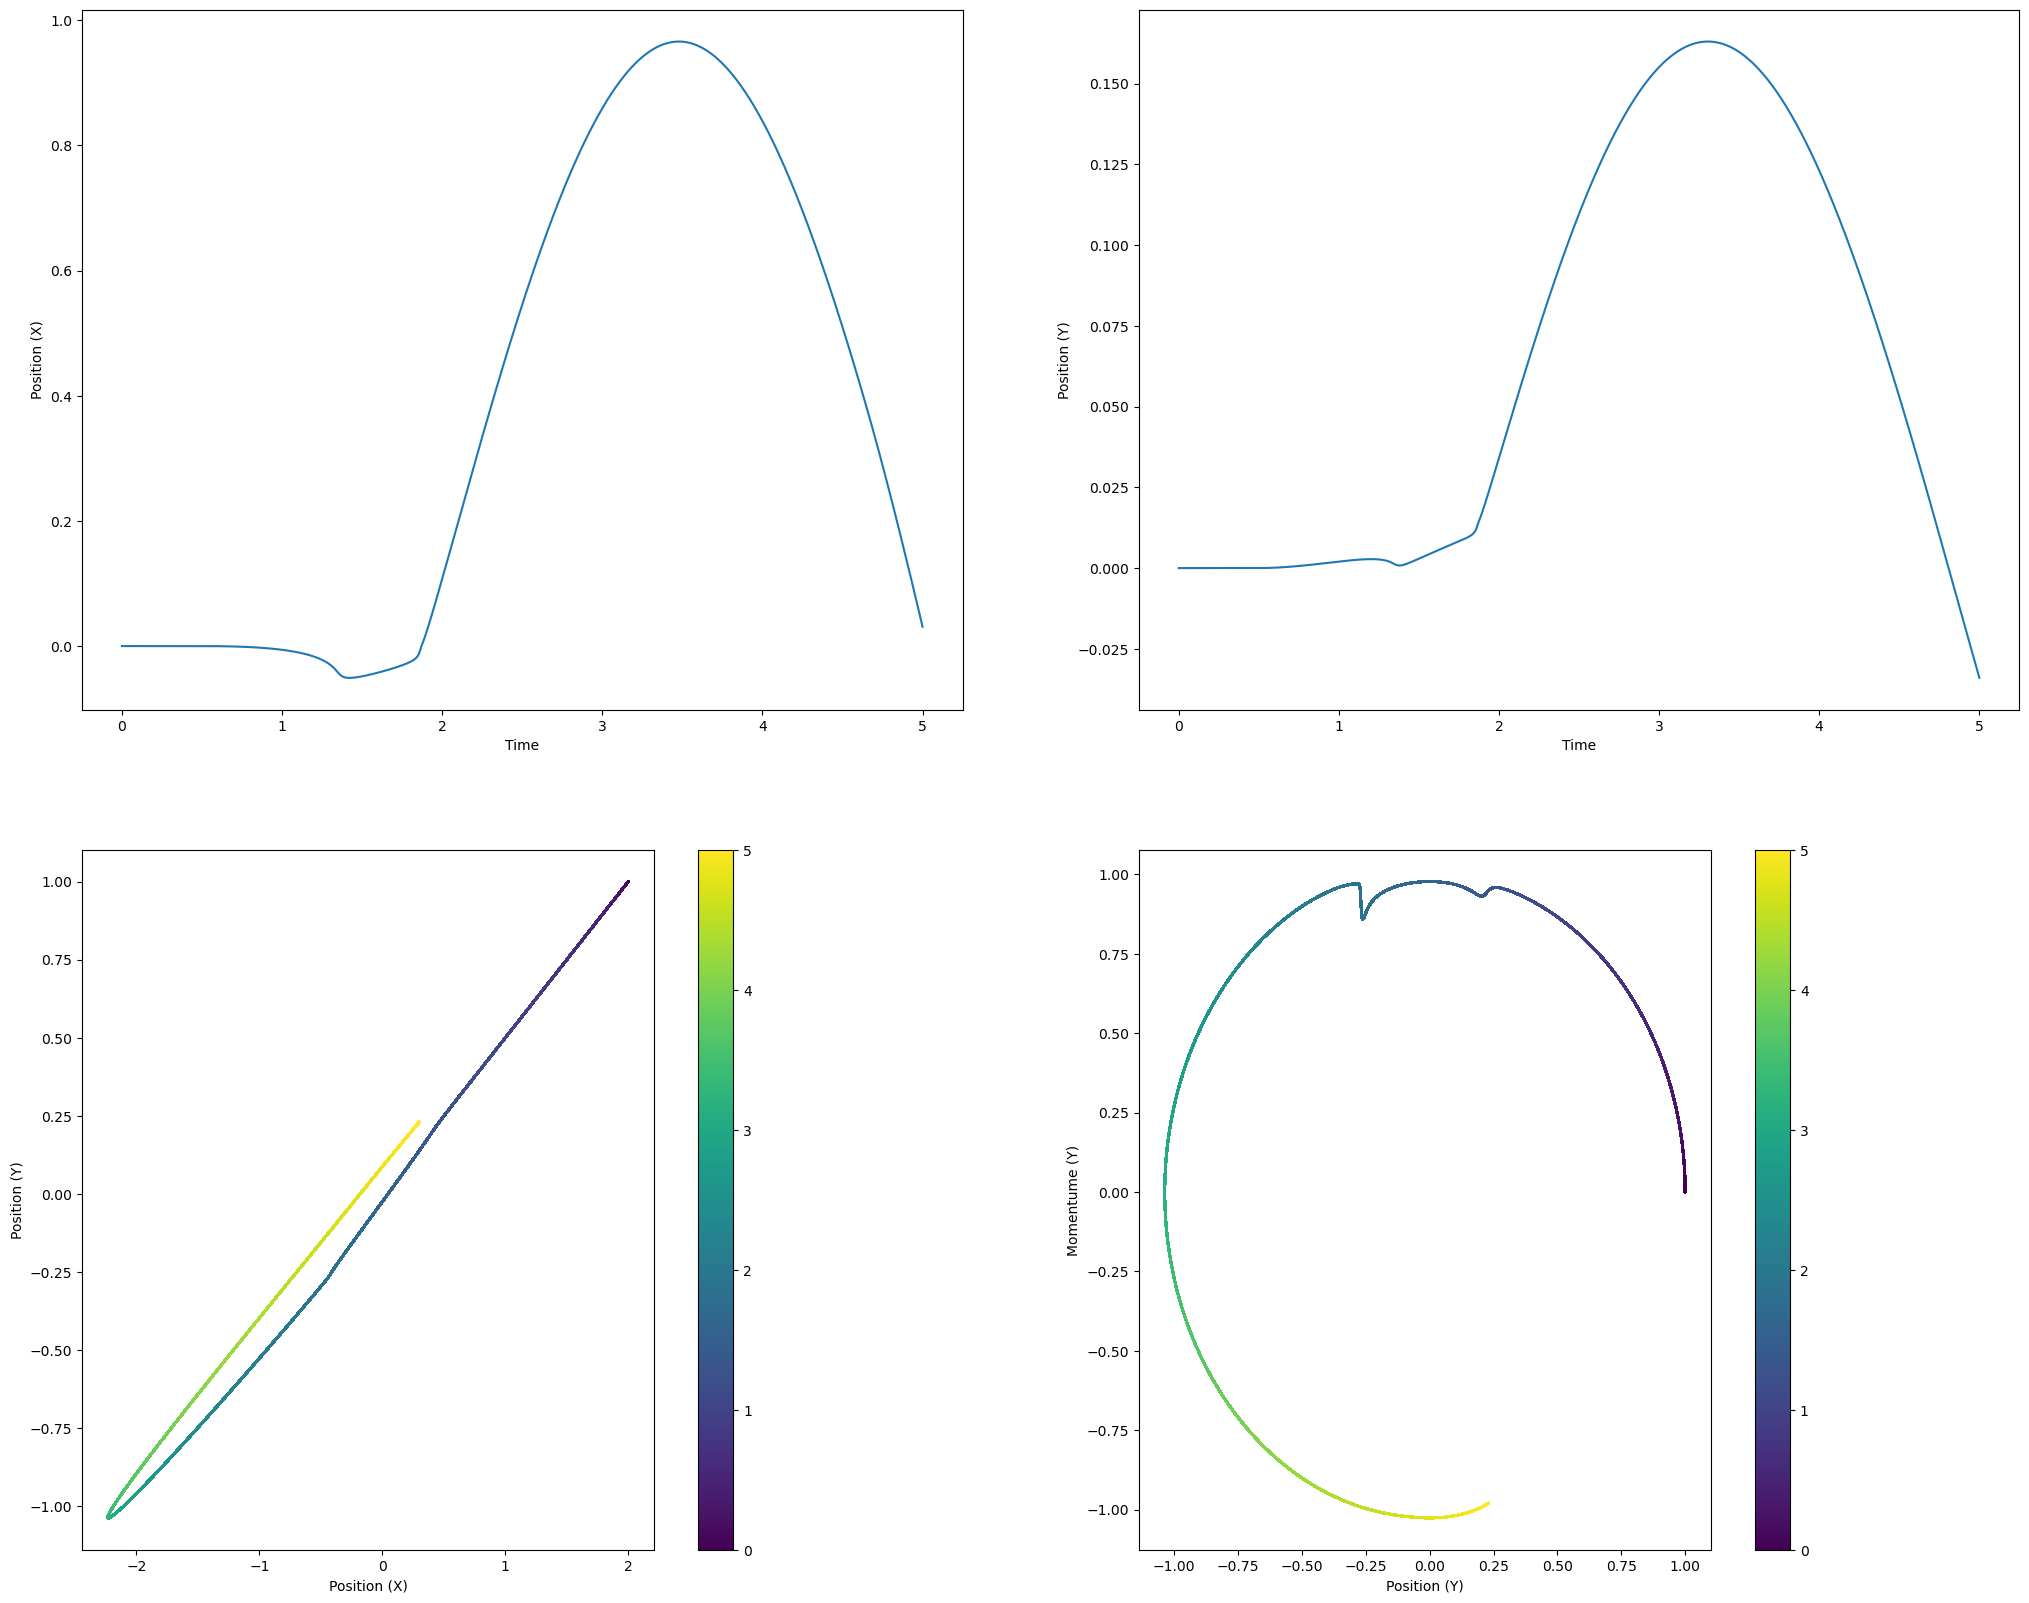

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.colors as mcolors

delta =  0.0000001
px = 0
py = 0
x =2
y = 1 
posx = []
posy = []
momx = []
momy = []
t = []
n = 50000000

for i in range(0,n):

    x += xdotf(px)*delta 
    y += ydotf(py)*delta
    px += pxdotf(x,y)*delta
    py += pydotf(x,y)*delta

    posx.append(x)
    posy.append(y)
    momx.append(px)
    momy.append(py)
    t.append(i)

fig, ax = plt.subplots(2,2, figsize = (25,20))
ax[0,0].plot(np.multiply(t,delta),np.imag(posx))
ax[0,0].set_ylabel('Position (X)')
ax[0,0].set_xlabel('Time')

ax[0,1].plot(np.multiply(t,delta),np.imag(posy))
ax[0,1].set_ylabel('Position (Y)')
ax[0,1].set_xlabel('Time')


ax[1,0].scatter(posx,posy,c=cm.viridis(np.divide(t,n)), s=0.5) 
ax[1,0].set_ylabel('Position (Y)')
ax[1,0].set_xlabel('Position (X)')

ax[1,1].scatter(posy,momy,c=cm.viridis(np.divide(t,n)), s=0.5)
ax[1,1].set_ylabel('Momentume (Y)')
ax[1,1].set_xlabel('Position (Y)')

norm = mcolors.Normalize(vmin=0, vmax= np.multiply(n,delta))
mappable = cm.ScalarMappable(norm=norm, cmap='viridis')
fig.colorbar( mappable, cmap = 'viridis', ax=ax[1,1], orientation='vertical', fraction=0.3)
fig.colorbar( mappable, cmap = 'viridis', ax=ax[1,0], orientation='vertical', fraction=0.3)




# Integration Using Composite Trapezoidal Rule
$$ \int_a^b f(x) dx \approx   \frac{b-a}{n} \bigg[ \frac{f(a)}{2} + \sum_{k=1}^{n-1} \bigg(  f(a - k\frac{b-a}{n})\bigg) + \frac{f(b)}{2} \bigg] $$

where n defines the number of sub intervals. 

# Full Interaction Potential

In [12]:
def pxdotf(x,y):
    lamb = 1/3 
    return -x - lamb *(-2*x**3+2*x*y**2+6*x)/((x**2-y**2-1)**2-4*x**2)**(3/2)

def pydotf(x,y):
    lamb = 1/3 
    return y - lamb *(2*y*x**2-2*y**3-2*y)/((-x**2+y**2+1)**2-4*x**2)**(3/2)

def xdotf(px):
    return px

def ydotf(py):
    return -py

def trap_rule(x0,y0,px0,py0,n,delta):
    px = px0
    py = py0
    x = x0
    y = y0
    xl = []
    yl = []
    pxl = []
    pyl = []
    time = []
    for t in range(0,n):
        x += (x +(xdotf(px)*t*delta))/2
        y += (y +(ydotf(py)*t*delta))/2
        px += (px +(pxdotf(x,y)*t*delta))/2
        py += (py +(pydotf(x,y)*t*delta))/2
        xl.append(x)
        yl.append(y)
        pxl.append(px)
        pyl.append(py)
        time.append(i)
    return xl,yl,pxl,pyl,time


    


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.colors as mcolors

delta =  0.000001
px = 0
py = 0
x =2
y = 1 
posx = []
posy = []
momx = []
momy = []
t = []
n = 10000

x,y,px,py,t = trap_rule(x,y,px,py,n,delta)
print(x)
print(y)
fig, ax = plt.subplots(2,2, figsize = (25,20))
ax[0,0].plot(x)
ax[0,0].set_ylabel('Position (X)')
ax[0,0].set_xlabel('Time')

ax[0,1].plot(np.multiply(t,delta),y)
ax[0,1].set_ylabel('Position (Y)')
ax[0,1].set_xlabel('Time')


ax[1,0].scatter(x,y,c=cm.viridis(np.divide(t,n)), s=0.5) 
ax[1,0].set_ylabel('Position (Y)')
ax[1,0].set_xlabel('Position (X)')

ax[1,1].scatter(y,py,c=cm.viridis(np.divide(t,n)), s=0.5)
ax[1,1].set_ylabel('Momentume (Y)')
ax[1,1].set_xlabel('Position (Y)')

norm = mcolors.Normalize(vmin=0, vmax= np.multiply(n,delta))
mappable = cm.ScalarMappable(norm=norm, cmap='viridis')
fig.colorbar( mappable, cmap = 'viridis', ax=ax[1,1], orientation='vertical', fraction=0.3)
fig.colorbar( mappable, cmap = 'viridis', ax=ax[1,0], orientation='vertical', fraction=0.3)

OverflowError: complex exponentiation